### Importing packages

In [94]:
import pandas as pd
import numpy as np
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt

### Importing data
Note: some of this code was adapted from a friends assignment as I liked his code style and found his implementation to be extremely efficient


In [10]:
data = pd.read_csv("mnist.csv", header=None)
features = data.values[:,1:]
labels = data.values[:,[0]]
print("Labels:\n",labels,"\nFeatures:\n",features)

Labels:
 [[5.]
 [0.]
 [4.]
 ...
 [8.]
 [6.]
 [9.]] 
Features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Images before pca

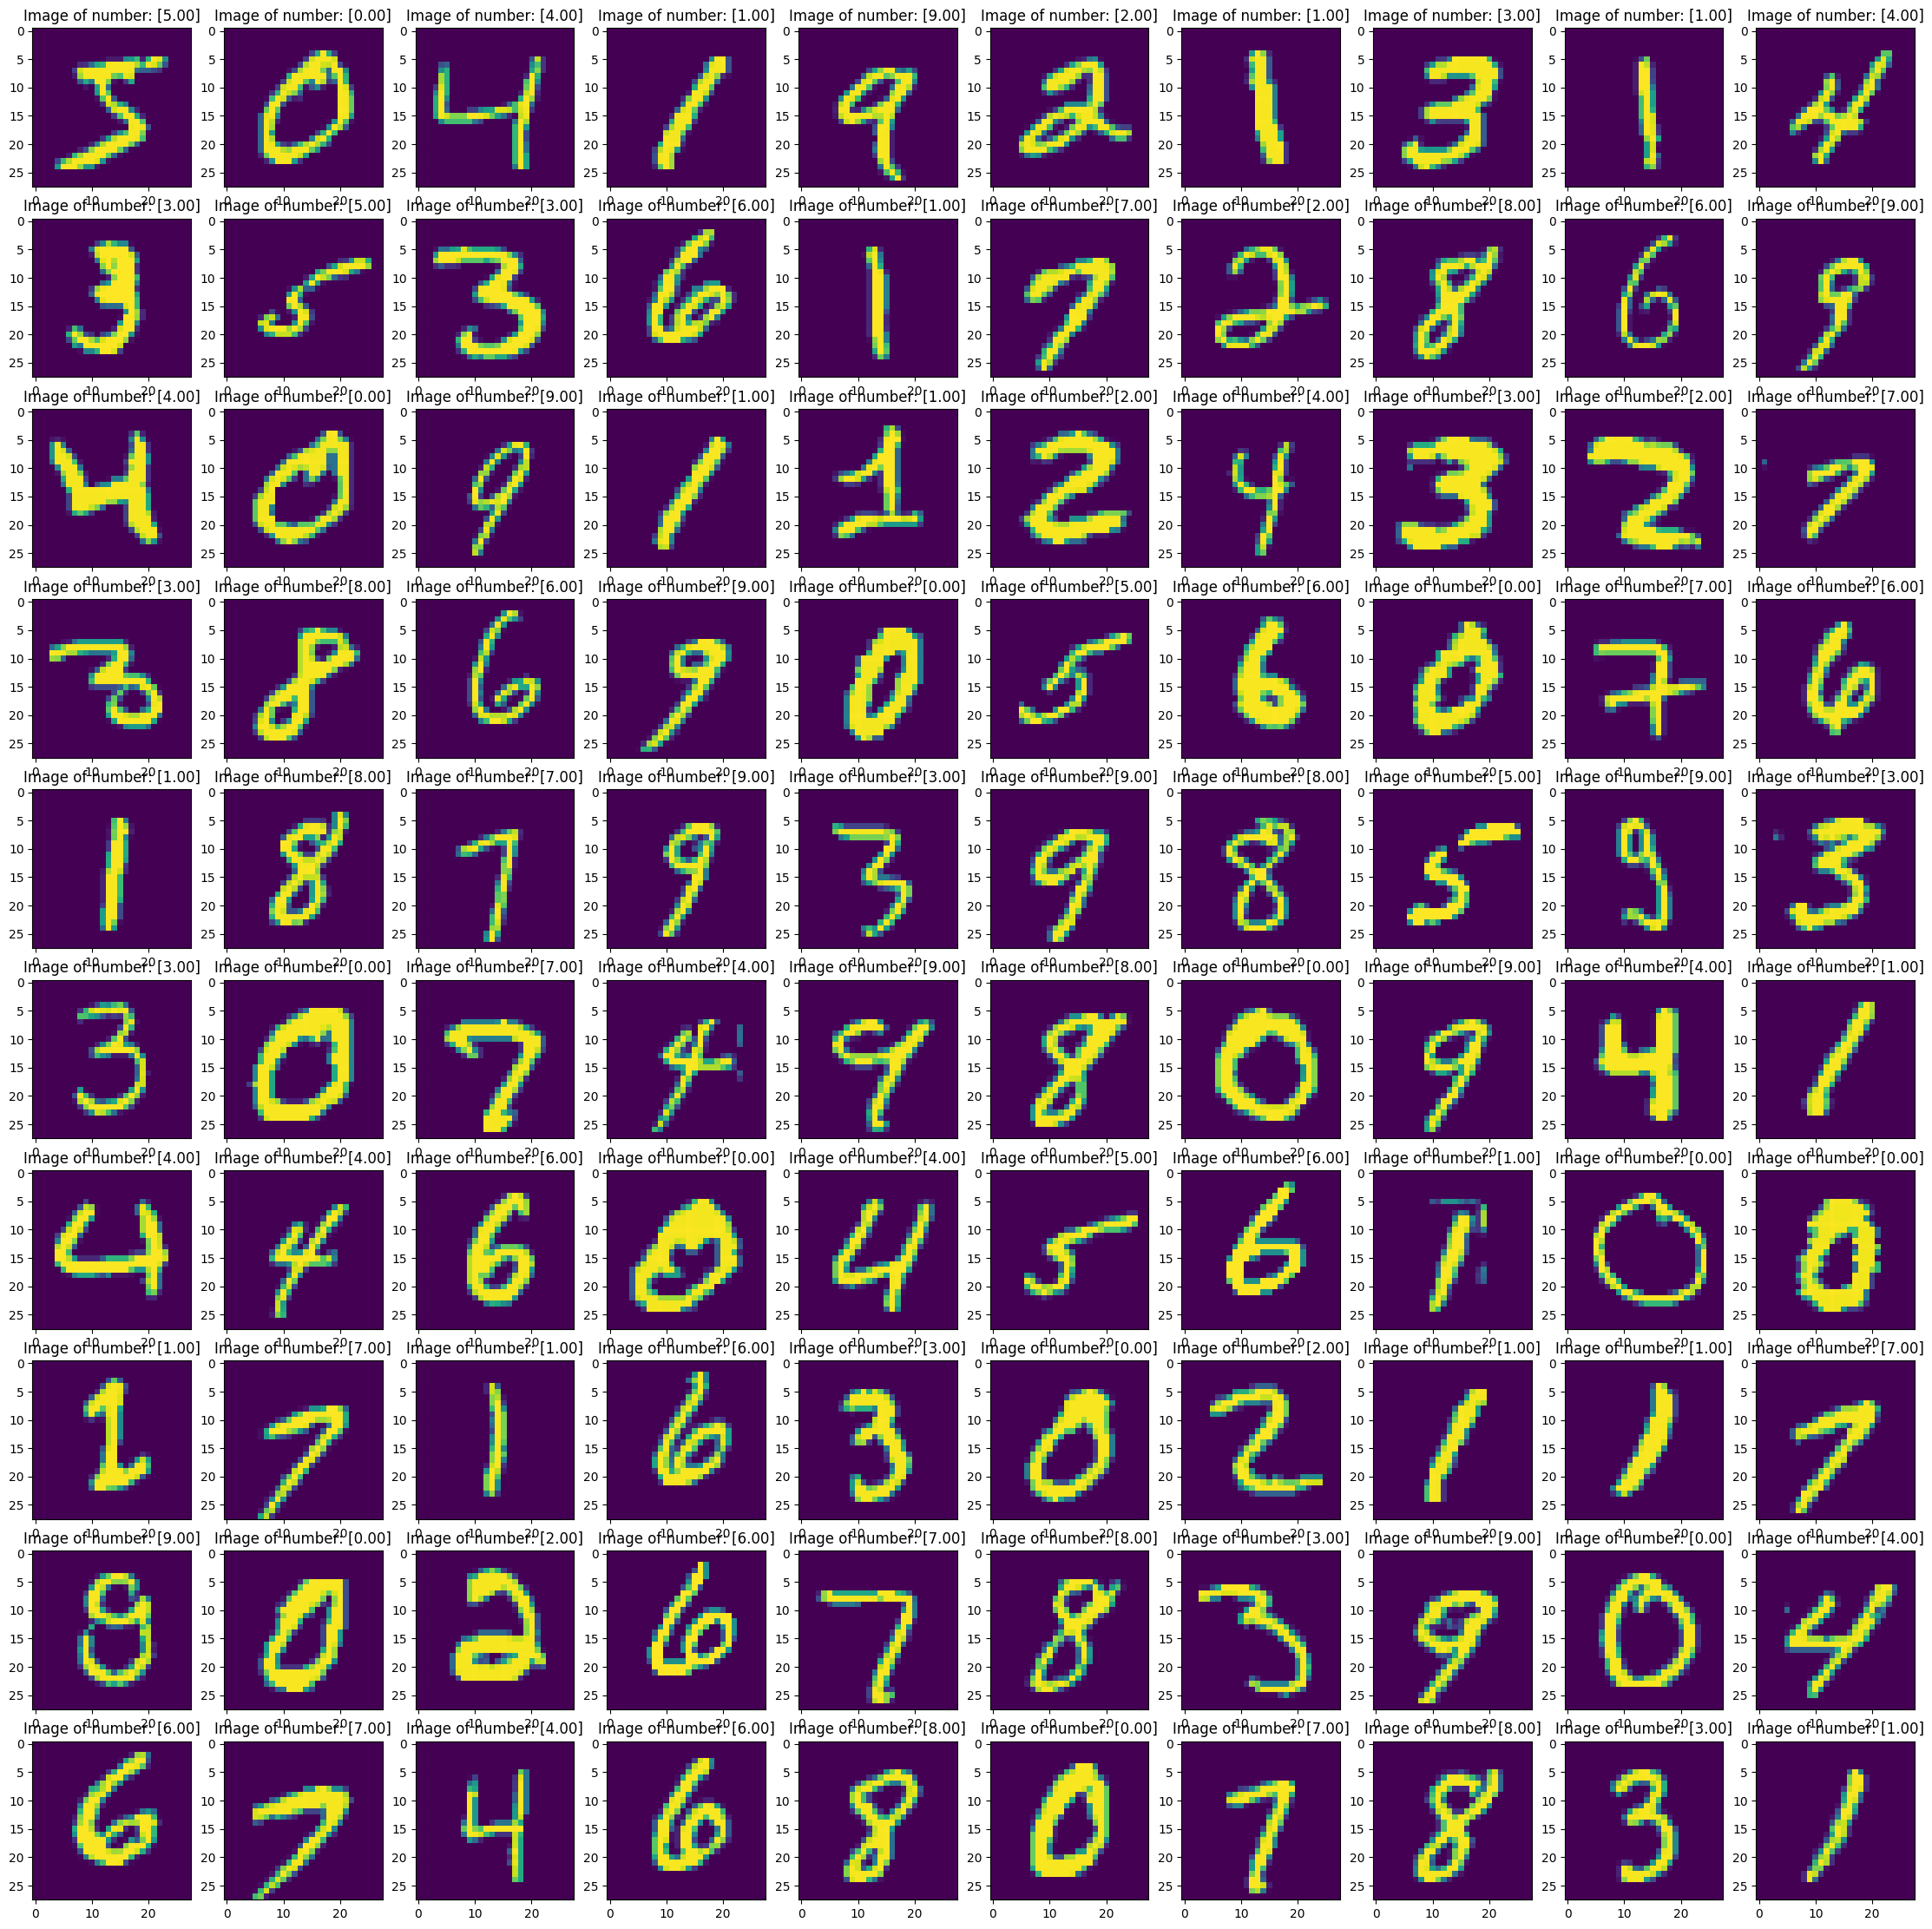

In [28]:
images = [[]]*6000
for i in range(100):
    images[i] = features[i].reshape(28,28)
    # plt.imshow(images[i], interpolation='nearest')
    # plt.show()
_, axs = plt.subplots(10, 10, figsize=(28, 28))
axs = axs.flatten()
incremeter = 0
for img, ax in zip(images, axs):
    ax.imshow(img)
    ax.set_title('Image of number: {}'.format(labels[incremeter]))
    incremeter = incremeter + 1
plt.show()

### Question 1
Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data


In [67]:
def PCA(features,dimensions):    
    # Importing feature vector
    X = features
    n,d = X.shape

    # Centralising Data
    M = np.mean(X.T, axis=1)
    X_c = X - M

    # Calculating the covariance matrix
    Cov = 1/n * np.matmul(X_c.T,X_c)

    # Calculating Eigen vectors and values
    values, vectors = np.linalg.eigh(Cov)

    # Select the last 10 Eigen vectors since ascending order
    D = np.diag(values)
    P = vectors[:,784-dimensions:784]
    print(values.shape)
    print(D.shape)

    # Calculated final X
    X_new = np.dot(X_c, P)
    Cov_transformed = 1/n * np.matmul(X_new.T,X_new)

    # Reconstruct original
    Reconstructed = np.matmul(X_new,P.T)
    return Reconstructed, Cov_transformed

def pca(X, dimensions):
    X_c = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_c , rowvar = False)
    # for symmetric arrays
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    # take the last 10 eigen vectors from columns as the column v[:, i] is the normalized eigenvector corresponding to the
    P = eigen_vectors[:,-dimensions:]
    # compute the result data 
    X_compressed = X_c @ P
    print("dimension of compressed data is ", X_compressed.shape)
    # Reconstruct original data by transforming back
    reconstructed = X_compressed @ P.T
    return reconstructed, np.cov(X_compressed , rowvar = False)


In [68]:
# from examining eigen value drop off, most of the data is contained in the maximumum 12-20 eigen values (dimensions)
dimensions = 20
reduced_data, transformed_cov = pca(features, dimensions)
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print("Transformed Covariance Matrix:\n",transformed_cov)
print("dimensions of reduced data", reduced_data.shape)

dimension of compressed data is  (6000, 20)
Transformed Covariance Matrix:
 [[0.60 0.00 -0.00 0.00 -0.00 -0.00 0.00 0.00 -0.00 -0.00 -0.00 -0.00
  -0.00 -0.00 0.00 -0.00 0.00 -0.00 -0.00 0.00]
 [0.00 0.63 0.00 0.00 -0.00 -0.00 -0.00 0.00 -0.00 -0.00 -0.00 0.00 -0.00
  0.00 -0.00 0.00 -0.00 0.00 0.00 0.00]
 [-0.00 0.00 0.66 0.00 0.00 0.00 -0.00 0.00 -0.00 0.00 0.00 -0.00 0.00
  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 0.00]
 [0.00 0.00 0.00 0.67 -0.00 -0.00 0.00 -0.00 0.00 -0.00 -0.00 0.00 -0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-0.00 -0.00 0.00 -0.00 0.82 -0.00 -0.00 0.00 -0.00 -0.00 -0.00 -0.00
  0.00 -0.00 -0.00 0.00 0.00 -0.00 -0.00 0.00]
 [-0.00 -0.00 0.00 -0.00 -0.00 0.86 -0.00 -0.00 0.00 0.00 0.00 -0.00 0.00
  -0.00 -0.00 0.00 -0.00 -0.00 0.00 -0.00]
 [0.00 -0.00 -0.00 0.00 -0.00 -0.00 0.88 -0.00 0.00 0.00 0.00 0.00 -0.00
  0.00 0.00 -0.00 -0.00 0.00 0.00 -0.00]
 [0.00 0.00 0.00 -0.00 0.00 -0.00 -0.00 0.89 -0.00 0.00 -0.00 -0.00 0.00
  -0.00 0.00 0.00 0.00 -0.00 -0.00 -0.00]
 [-

#### Reconsturcting first 100 images
https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib/54681765#54681765

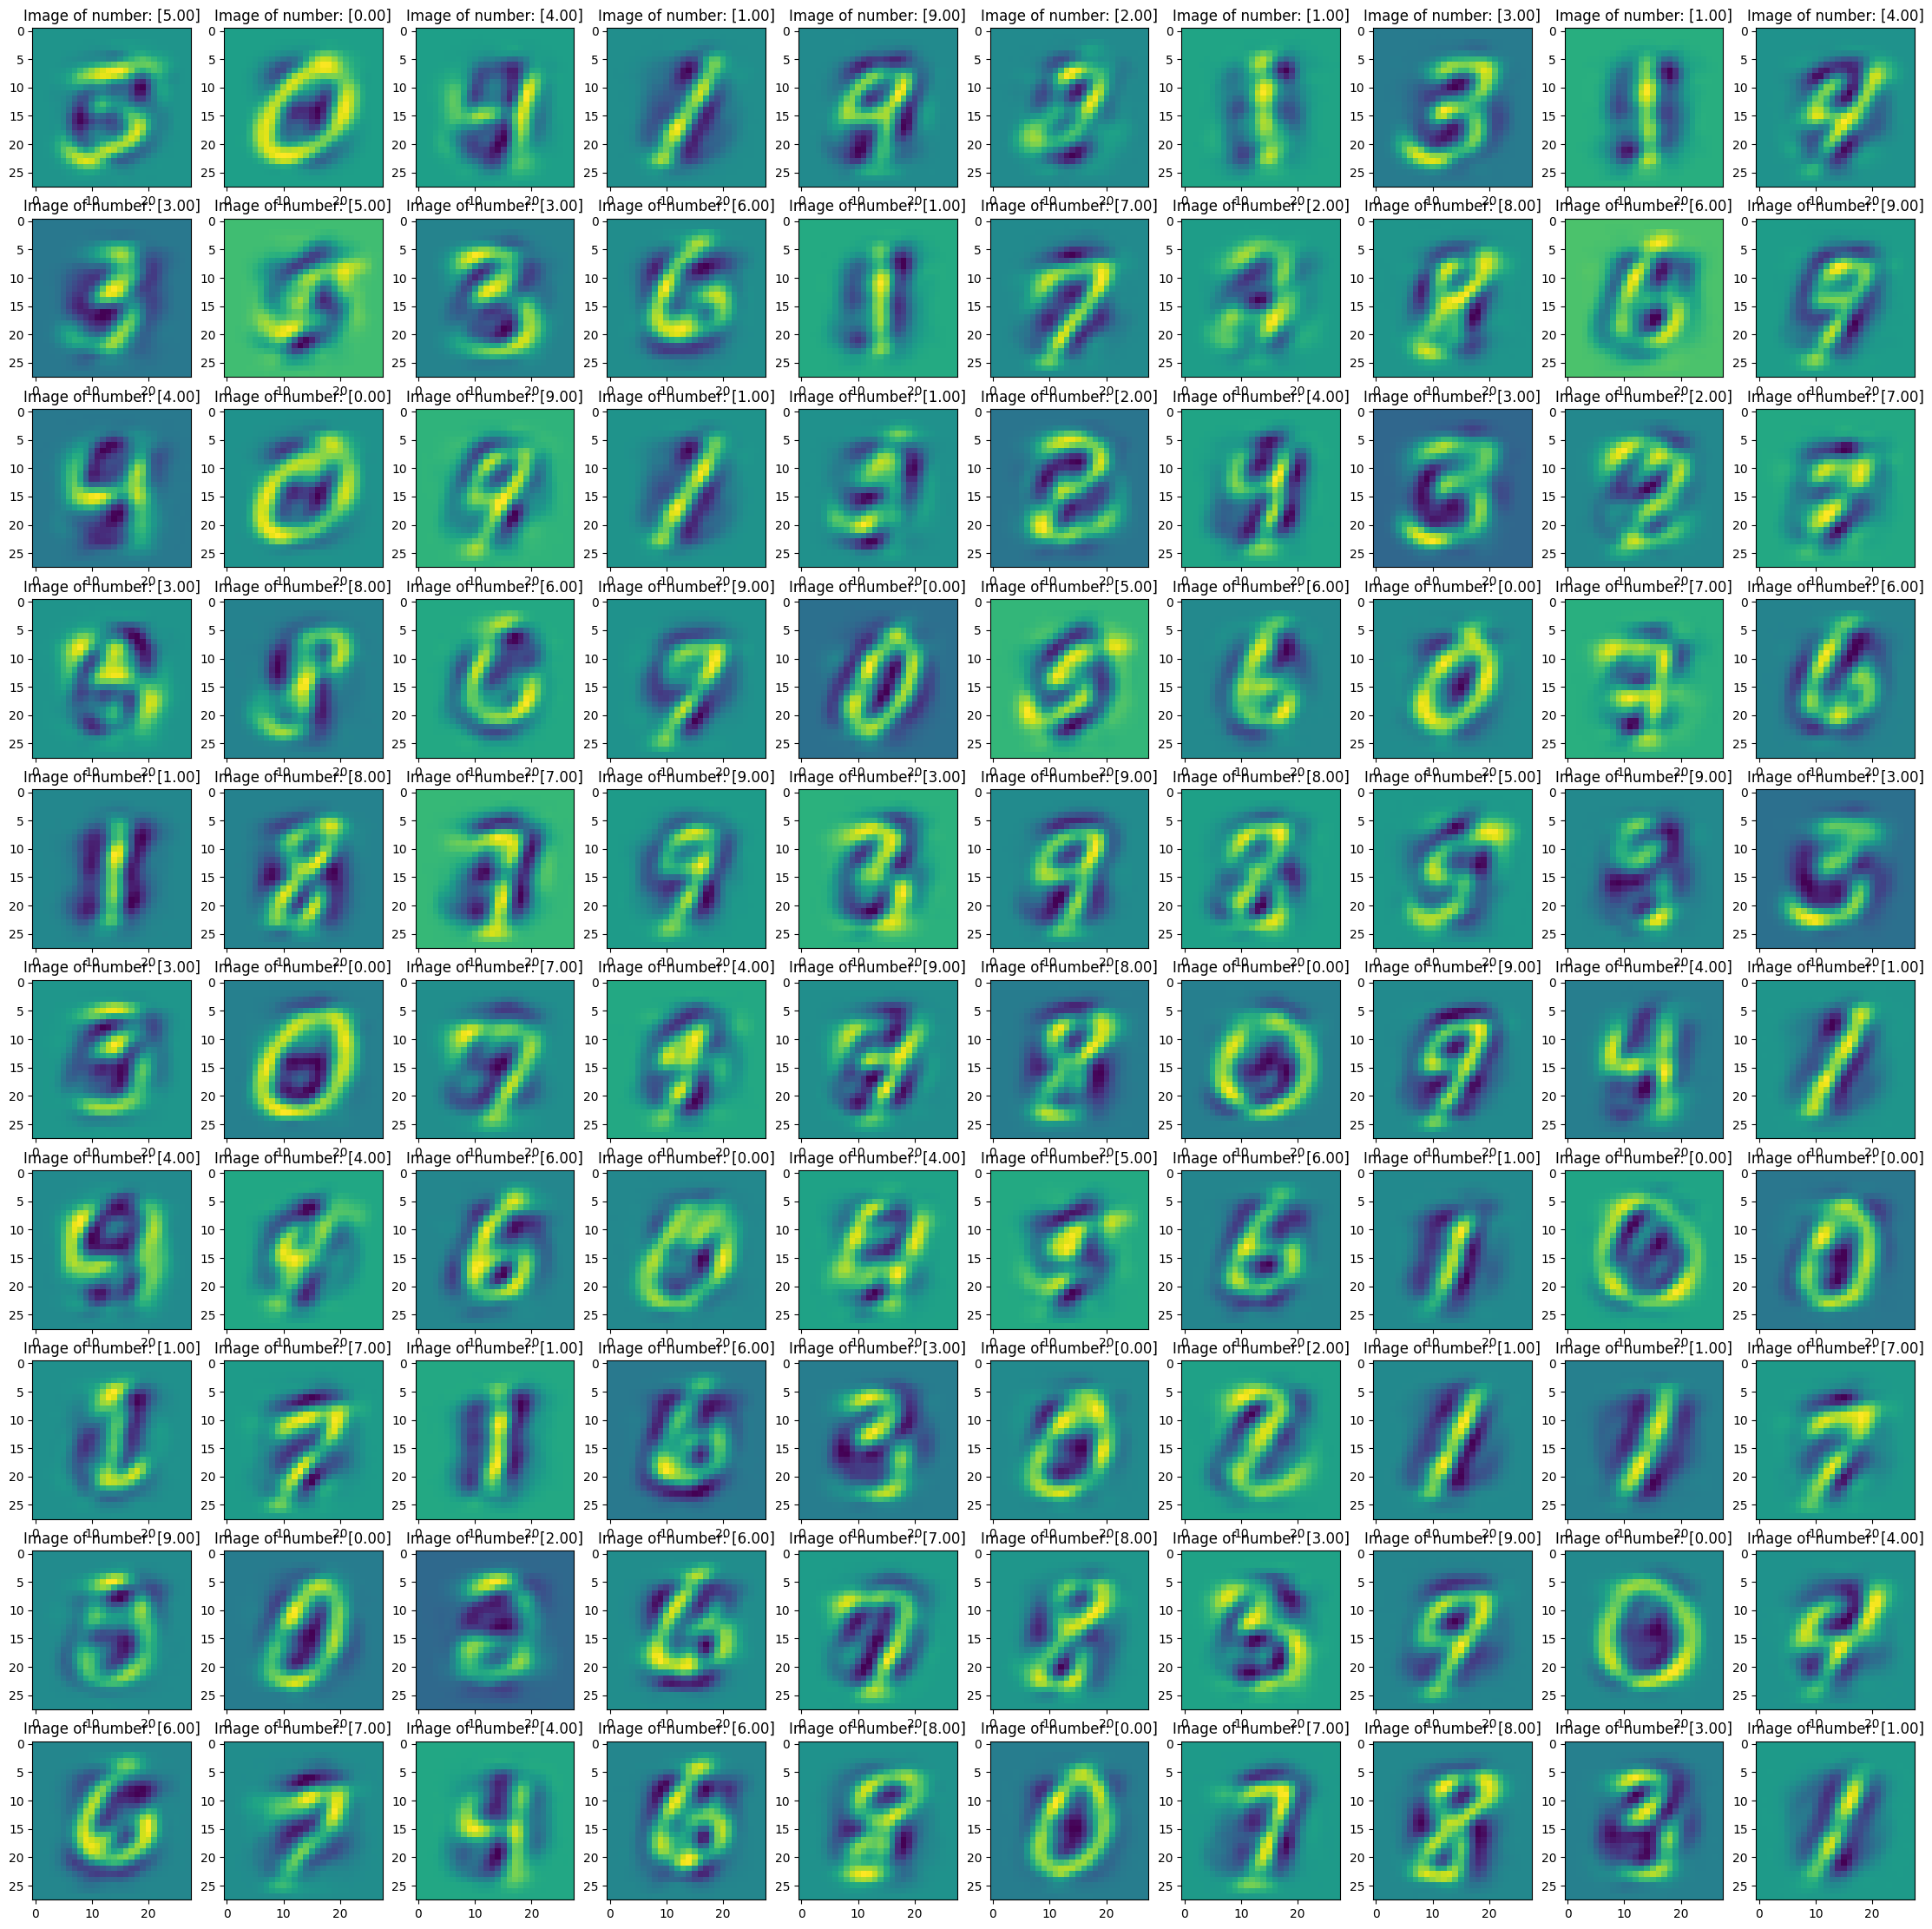

In [70]:
images = [[]]*100
for i in range(100):
    # convert 784 pixels into a 28 * 28 matrix
    images[i] = reduced_data[i].reshape(28,28)

_, axs = plt.subplots(10, 10, figsize=(28, 28))
axs = axs.flatten()
incremeter = 0
for img, ax in zip(images, axs):
    ax.imshow(img)
    ax.set_title('Image of number: {}'.format(labels[incremeter]))
    incremeter = incremeter + 1
plt.show()

### question 2
Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups


In [74]:
def kmeans(features,k,if_plot):
    X = features
    n,d = X.shape

    # 1. Initialise variables and randomly chose inital centers
    np.random.seed(1)
    centers = X[np.random.choice(n, k, replace=False)]    
    closest_centers = np.zeros(n).astype(int)
    distances_to_centers = np.zeros((n,k))

    # While closest centers is decreasing
    iterations = 0
    while True:
        old_closet_centers = closest_centers.copy()
        # 2a. Assign labels based on centers and Find closest centers
        for i in range(k):
            # taking euclidean norm (distance)
            distances_to_centers[:,i] = ((X-centers[i])**2).sum(axis=1)**0.5
        closest_centers = np.argmin(distances_to_centers, axis=1)

        # 2b. Find new centers/centroids from means of points
        for i in range(k):
            centers[i,:] = X[closest_centers == i].mean(axis=0)

        # Plot loss curve
        if (if_plot == 1):
            # get min of array
            min_distances = np.amin(distances_to_centers, axis=1)
            loss = np.sum(min_distances)
            plt.scatter(iterations, loss)

        # 2c. Check for convergence
        if np.all(closest_centers == old_closet_centers):
            break
        iterations = iterations + 1
        
    # Setup plot
    if (if_plot == 1):
        plt.xlabel("Interation")
        plt.ylabel("Loss (J)")
        plt.title("Loss Curve vs Iteration for K=10")
        plt.show()

    # Return final
    loss = 0
    for i in range(n):
        loss = loss + ((distances_to_centers[i][closest_centers[i]])**2)**0.5
    return closest_centers, centers, loss

### Question 3
Please plot the loss curve, that is, the change of loss value of the k-means algorithm with respect to the number of iterations. Store loss as we compute k-means in original function.

From the plot graph seems to converge around 10-12 iterations

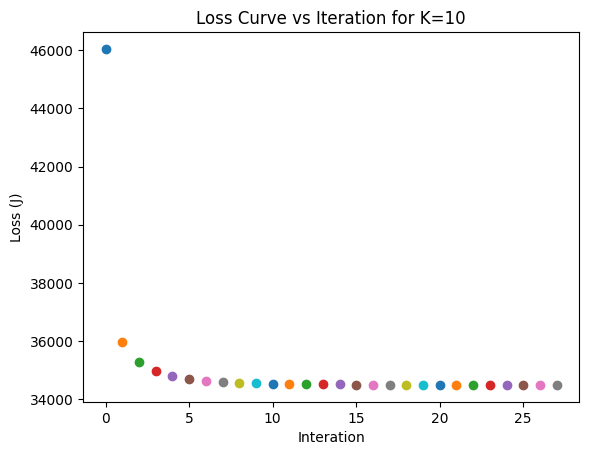

clustering [11 16 18 ...  4 10  1]


In [77]:
# 20 clusters
k=20
labels_kmeans, centers_kmeans, loss_kmeans = kmeans(features,k,1)
print("clustering", labels_kmeans)



resultant clustering is
Images in cluster 0:


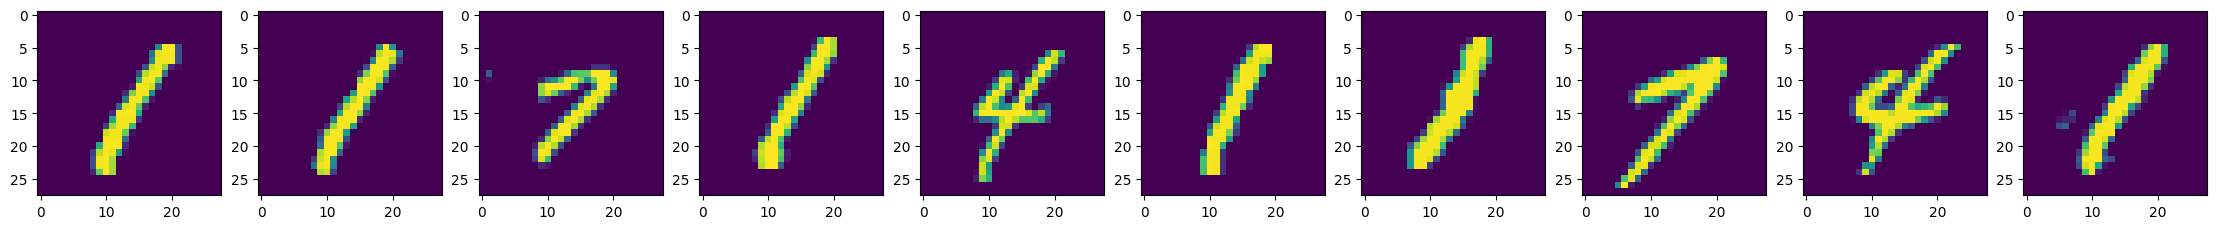

Images in cluster 1:


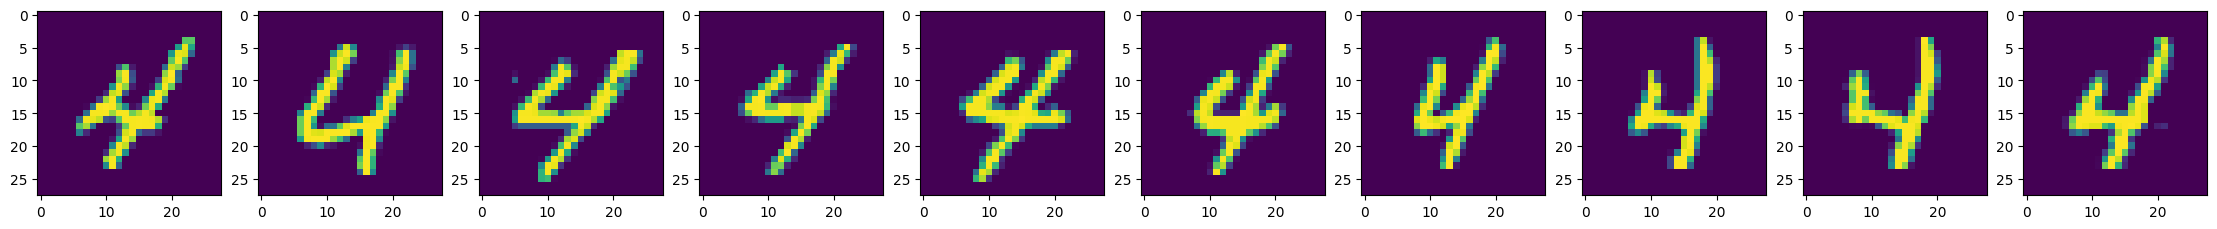

Images in cluster 2:


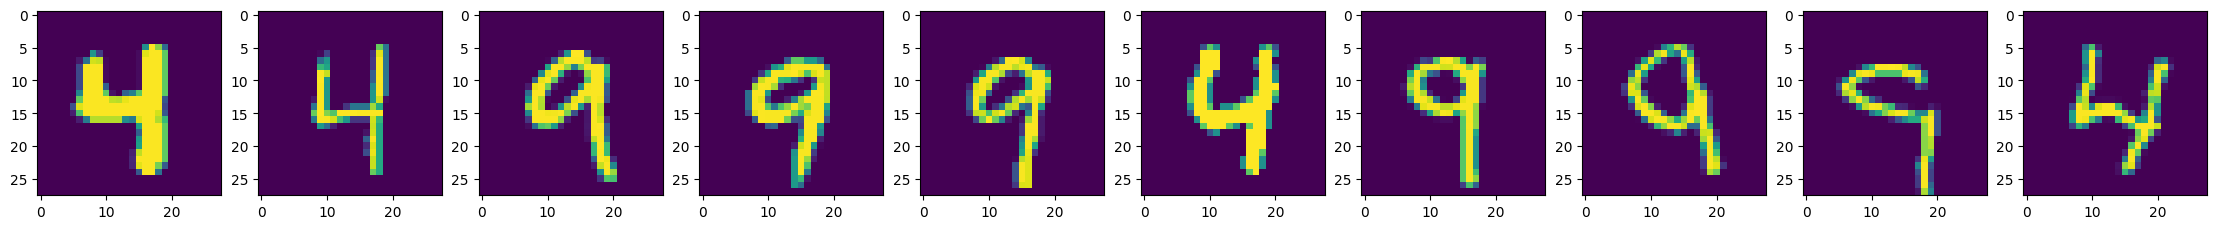

Images in cluster 3:


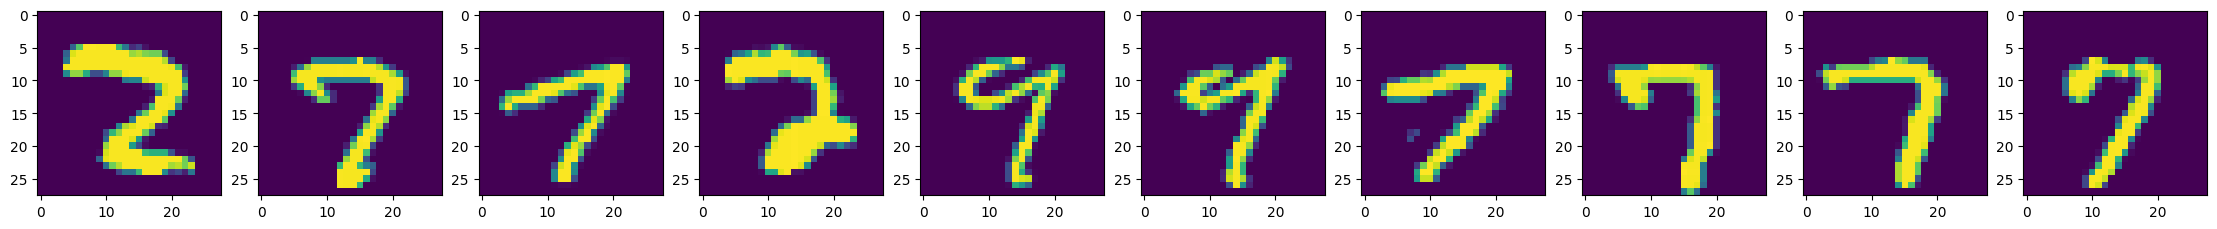

Images in cluster 4:


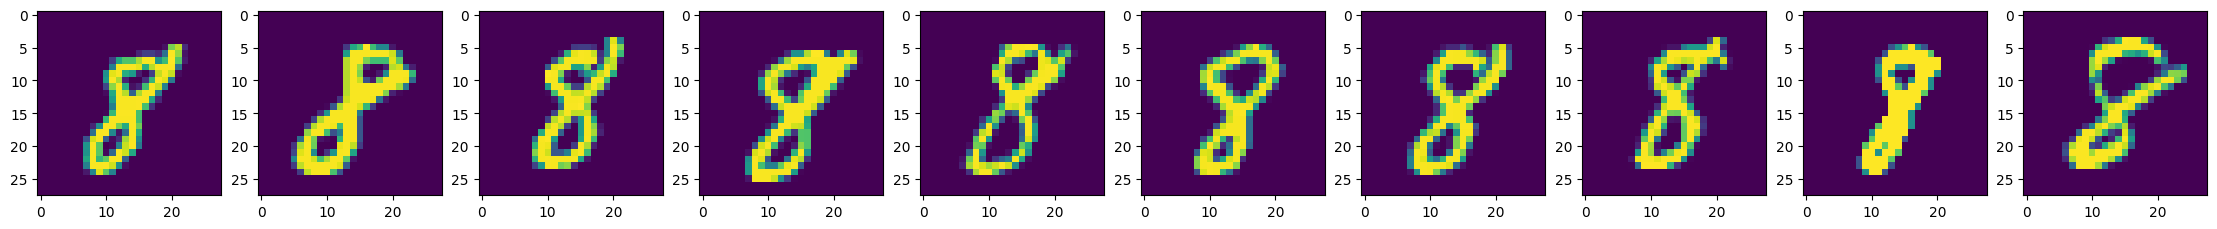

Images in cluster 5:


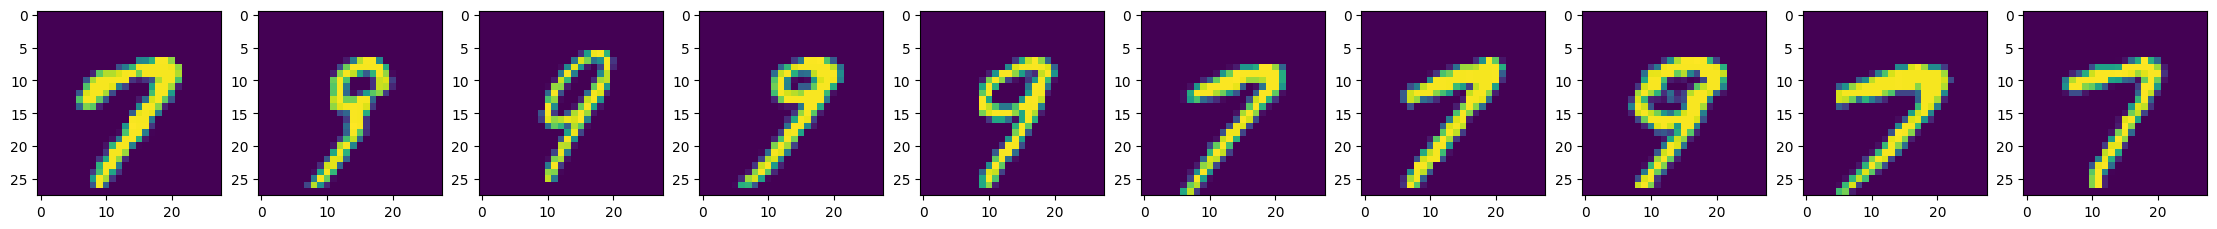

Images in cluster 6:


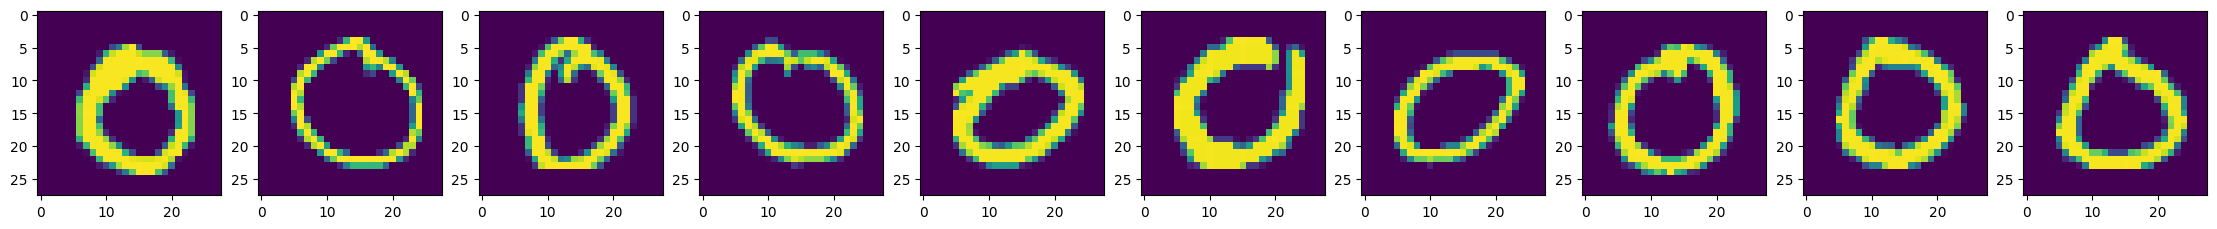

Images in cluster 7:


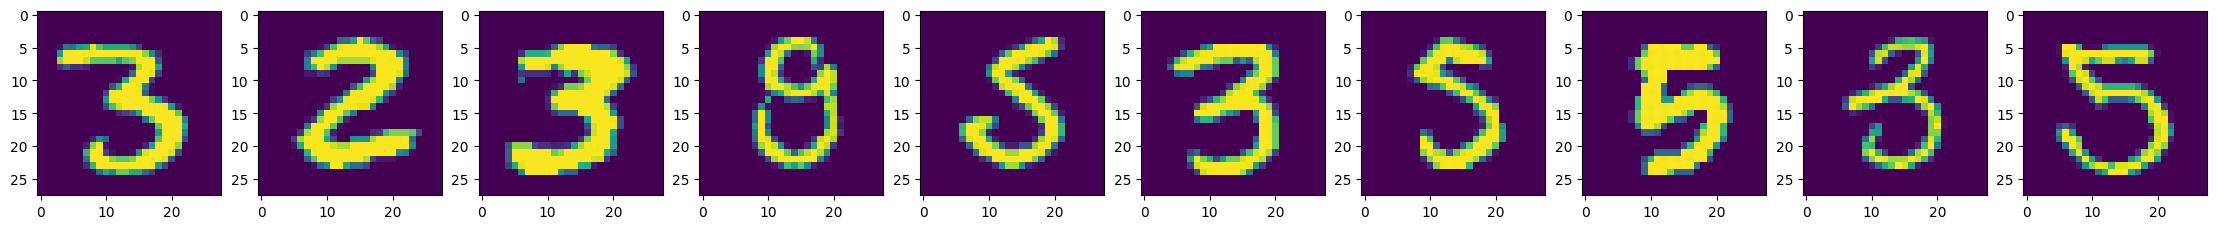

Images in cluster 8:


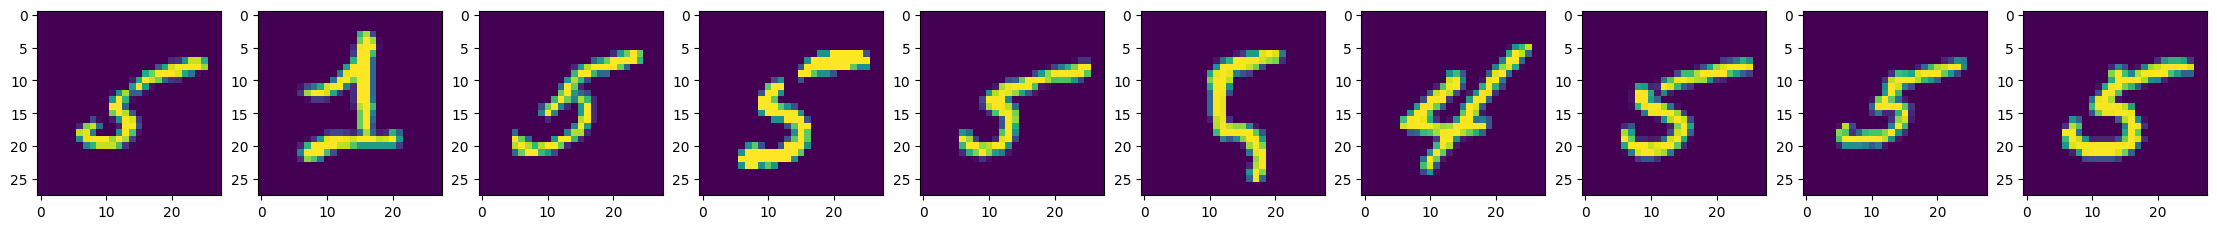

Images in cluster 9:


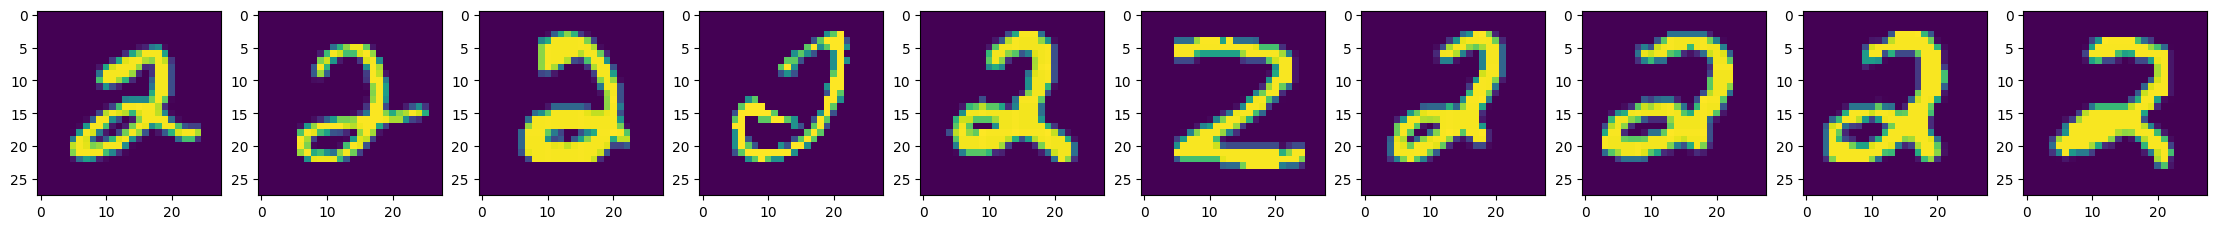

Images in cluster 10:


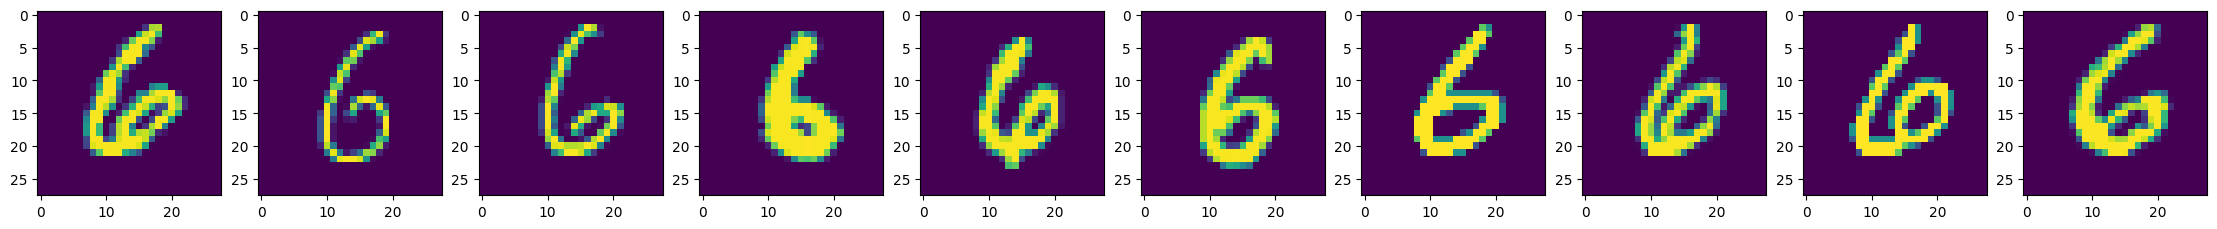

Images in cluster 11:


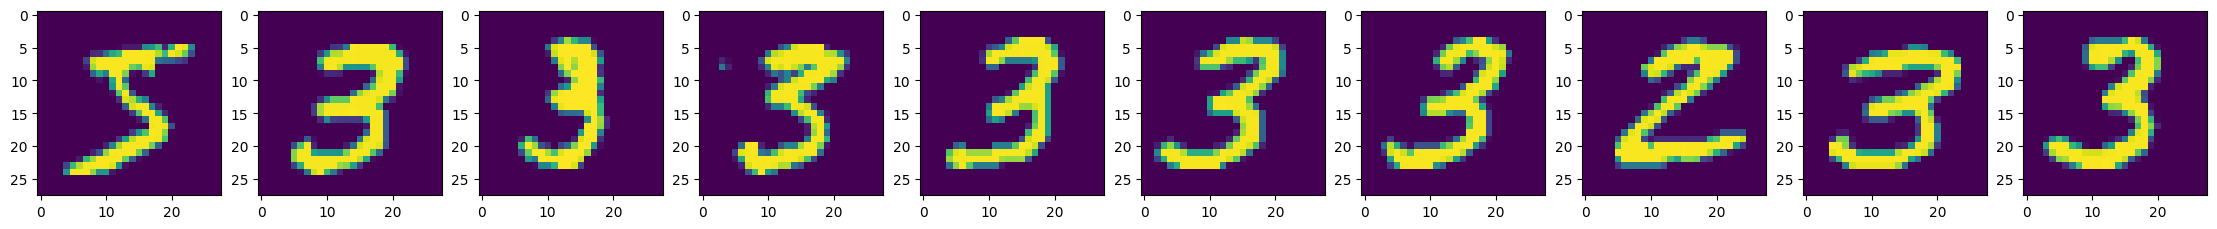

Images in cluster 12:


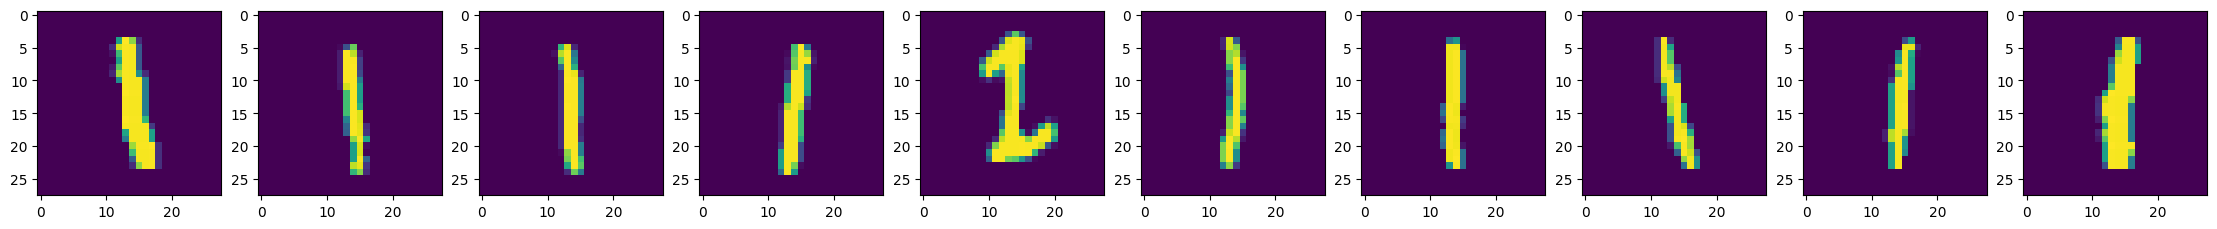

Images in cluster 13:


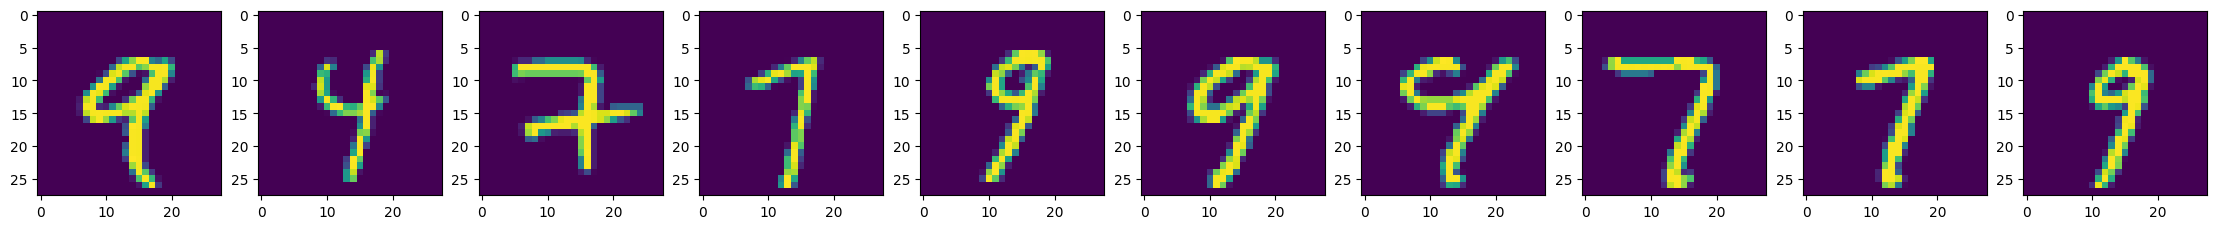

Images in cluster 14:


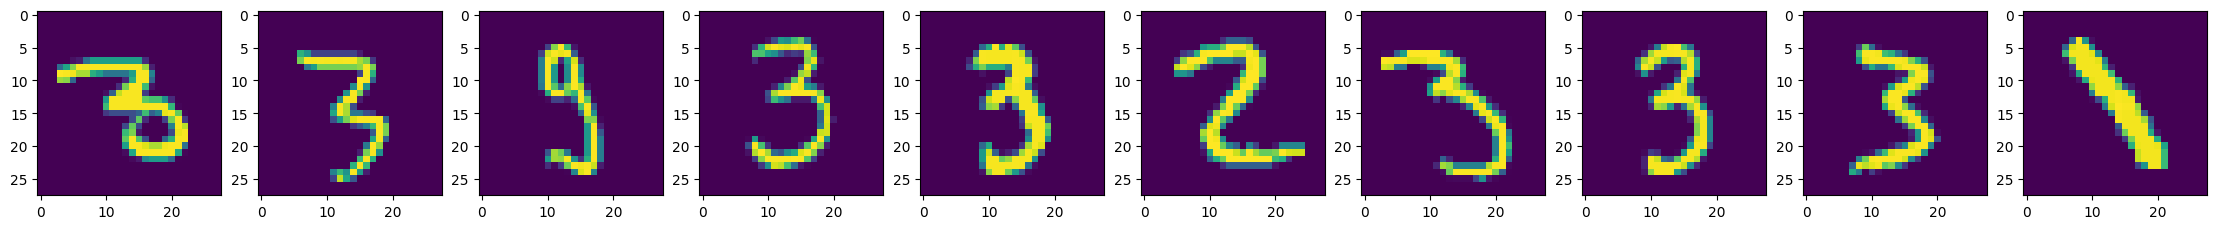

Images in cluster 15:


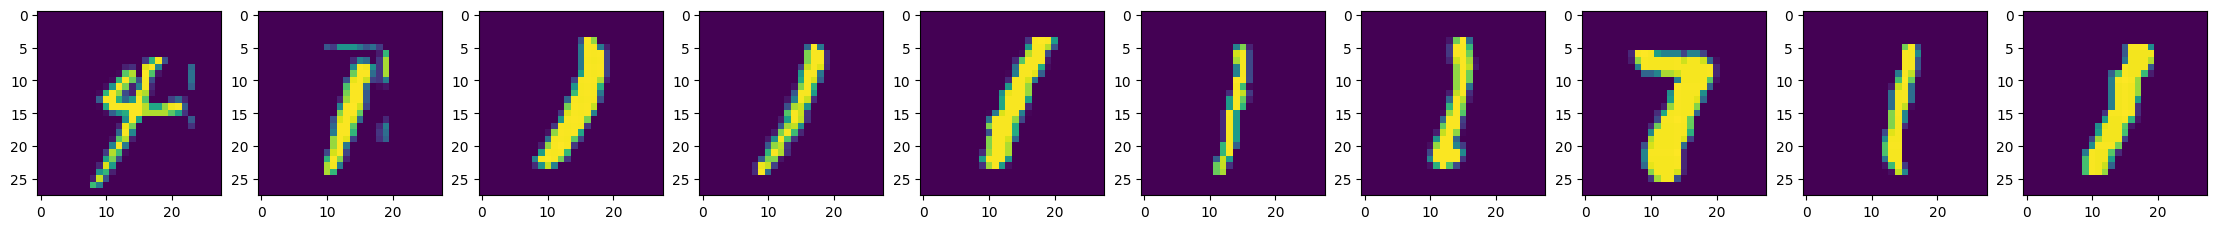

Images in cluster 16:


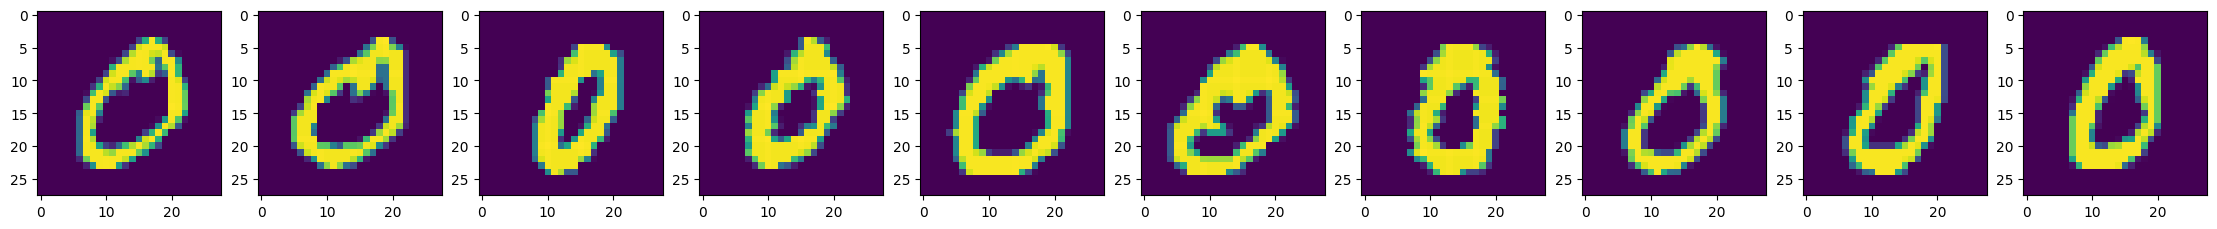

Images in cluster 17:


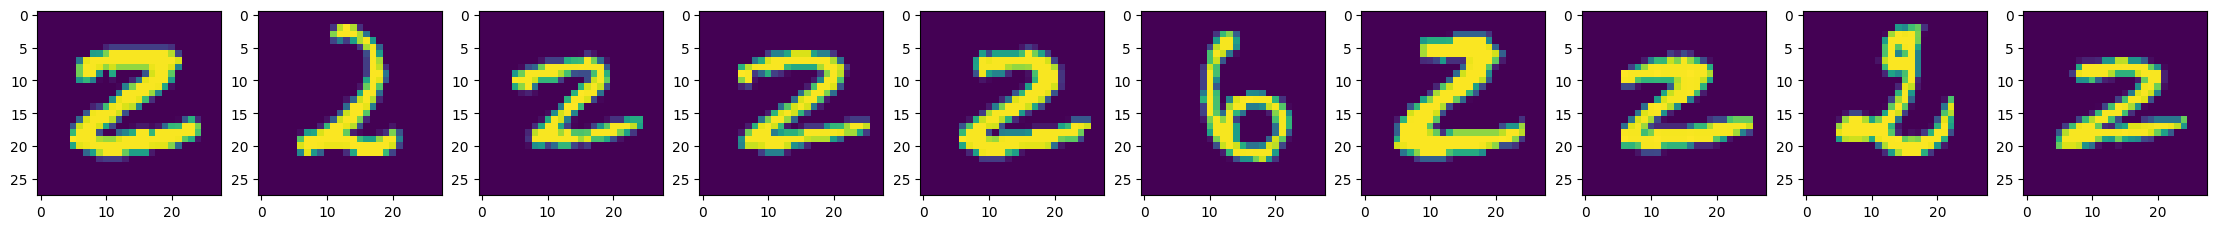

Images in cluster 18:


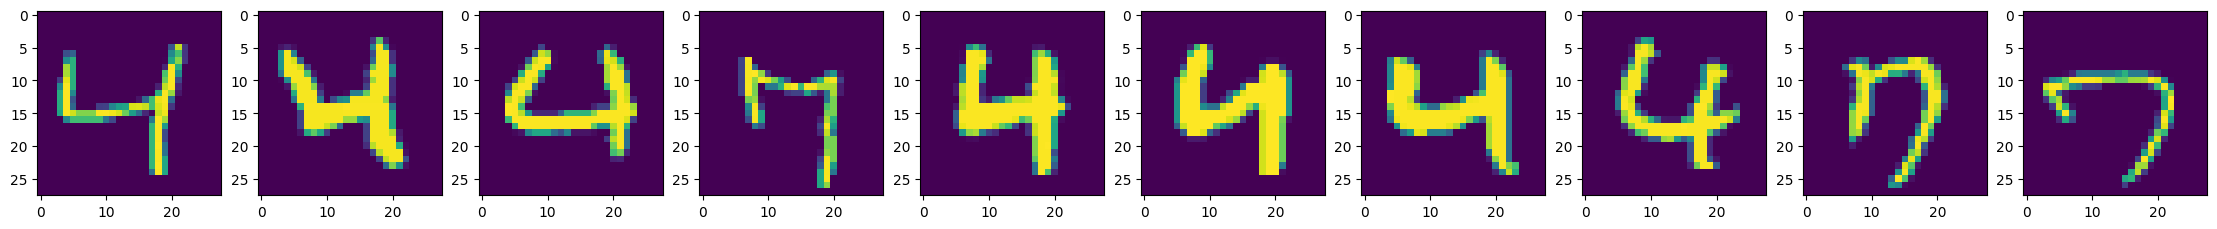

Images in cluster 19:


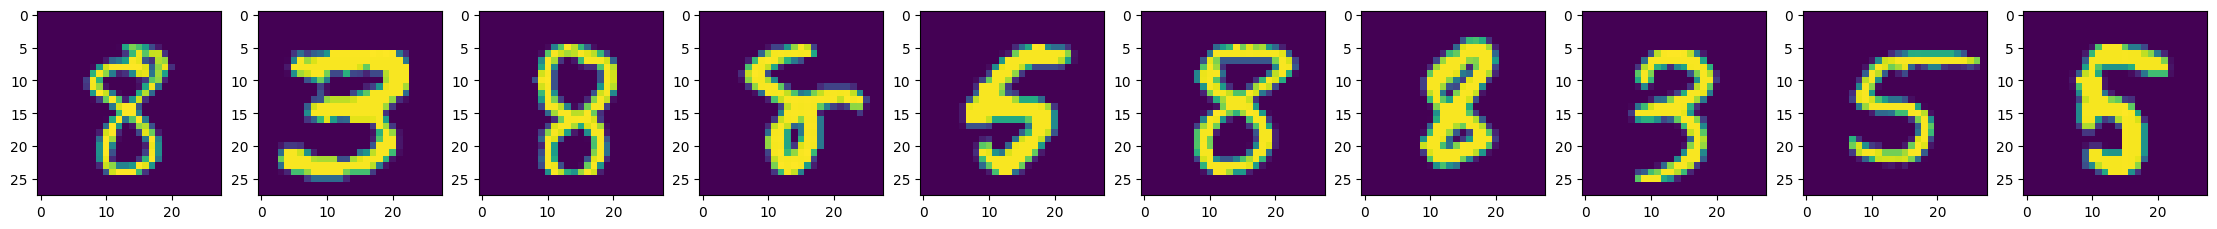

In [78]:
print("resultant clustering is")
clusters = []
images = [[]]*10
for i in range(k):
    clusters.append(features[labels_kmeans == i])
    for j in range(10):
        images[j] = clusters[i][j].reshape(28,28)
    print("Images in cluster {}:".format(i))
    _, axs = plt.subplots(1, 10, figsize=(28, 28))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img)
    plt.show()

### Question 4
Please use the first 4000 samples as the training set and remaining 2000 samples as the validation set, and design a way to choose the best k in k-means algorithm. Please copy your code snippet here. Get cluster means from training set. Validation set is used to compute loss

**Training set:** A set of examples used for learning, that is to fit the parameters of the classifier.

**Validation set:** A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.

In [79]:
# Split Dataset into training and validation sets
labels_train = labels[:4000]
labels_validation = labels[4000:6000]
features_train = features[:-2000]
features_validaton = features[-2000:]


In [80]:
# Function to find validation set loss
def Validation_kmeans(features_validaton, labels_validation, centers_training, k):
    n,d = features_validaton.shape

    # Assign labels based on centers and Find closest centers
    distances_to_centers = np.zeros((n,k))
    for i in range(k):
        distances_to_centers[:,i] = ((features_validaton-centers_training[i])**2).sum(axis=1)**0.5
    closest_centers = np.argmin(distances_to_centers, axis=1)

    # Calculate loss
    min_distances = np.amin(distances_to_centers, axis=1)
    loss = np.sum(min_distances)
    return loss

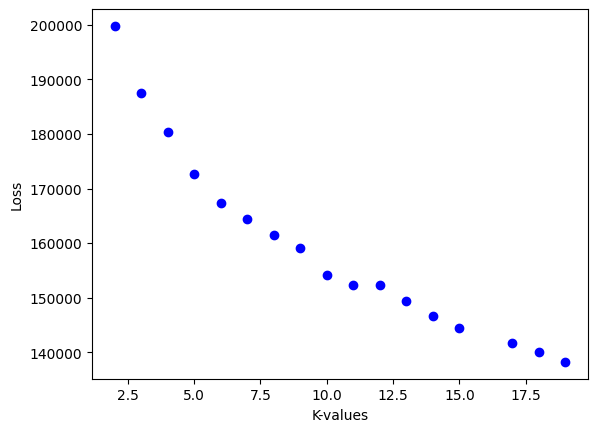

In [ ]:
# Pick inital range for K
K_1 = [2,10,100,500,1000,1500,2000]
# K_1 = [10]

# For each K train and validation
for k in K_1:
    print("K Means Clustering for K = {}".format(k))
    labels_training, centers_training, loss_training = kmeans(features_train, k, 0)
    loss = Validation_kmeans(features_validaton, labels_validation, centers_training, k)
    print("Loss for K = {} is: {:.0f}".format(k,loss))
    plt.scatter(k, loss)
plt.xlabel("K")
plt.ylabel("Loss (J)")
plt.title("Loss vs K ")
plt.show()

## Runtime approx 2m 30s ##

In [ ]:
# Pick 3nd range for K
K_3 = [1400,1450,1500,1550,1600]

# For each K train and validation
for k in K_3:
    print("K Means Clustering for K = {}".format(k))
    labels_training, centers_training, loss_training = kmeans(features_train, k, 0)
    loss = Validation_kmeans(features_validaton, labels_validation, centers_training, k)
    print("Loss for K = {} is: {:.0f}".format(k,loss))
    plt.scatter(k, loss)
plt.xlabel("K")
plt.ylabel("Loss (J)")
plt.title("Loss vs K ")
plt.show()

## Runtime approx 3m 15s ##
## At this range the change in loss doesnt vary by more than 4, however k = 1500 still lowest so select that value for K ##
## Could choose even tighter range, however time to run code is quite long ## 

### Question 5
Implement kernel k-means algorithm with RBF-kernel

Use the first 500 samples and cluster the them into 5 groups. This is for reducing the running time of your code. 


In [100]:
# x1 and x2 are vectors
def rbf_kernel(x1, x2, twosigmasquared):
    # numerator  
    numerator = -(np.square(abs(np.subtract(x1,x2))).sum())
    # numerator = -np.linalg.norm(x1, x2)**2
    denominator = twosigmasquared
    result = np.exp(numerator/denominator)
    return result

In [84]:
def rbfHyperparamater(X):
    n,d = X.shape
    twosigmasquared = 0
    for i in range(n):
        for j in range(n):
            twosigmasquared += np.square(abs(np.subtract(X[i],X[j]))).sum()
    twosigmasquared = 1/n**2 * twosigmasquared
    return twosigmasquared

In [101]:
def rbf_kernel_kmeans(X,k,twosigmasquared,if_plot):
    n,d = X.shape
    # Calculate kernel matrix (table) by precomputing kernel matrix for every point
    Kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Kernel[i][j] = rbf_kernel(X[i],X[j],twosigmasquared)

    # Set inital cluster assignments, first 100 to k=1, 2nd 100 to k=2 ... last 100 to k=5
    # r = np.array(random.randint(0, k - 1) for _ in range(n)])
    r = np.zeros((n,k))
    point = 0
    for i in range(k):
        for j in range(int(n/k)):
            r[point][i] = 1
            point = point + 1
    
    
    print("intial clusters assignment matrix", r)

    # Set inital distances
    distances_to_centers = np.zeros((n,k))

    # While assignments changing
    iterations = 0
    while True:
        r_old = r.copy()

        # Calculate distances from each point to each cluster mean; i denotes cluster number
        for i in range(k):
            double_sum = 0
            for m in range(n):
                for l in range(n):
                    # formula from lectures, r tells us which entry is assigned to a cluster
                    double_sum += r[m][i] * r[l][i] * Kernel[m][l]
            # m denotes sample number
            for m in range(n):
                term1 = rbf_kernel(X[m],X[m],twosigmasquared)
                term2 = 2 / np.sum(r[:,i]) * np.sum(r[:,i] * Kernel[:,m])
                # np.sum() gets number of assignments for ith cluster
                term3 = 1 / np.sum(r[:,i])**2 * double_sum
                distances_to_centers[m,i] =  term1 - term2 + term3
        
        # Find min distances and assign each point to their min (we go along columns to find cluster index)
        closest_centers = np.argmin(distances_to_centers, axis=1)
        r = np.zeros((n,k))
        for i in range(n):
            # our new assignment becomes the index of the closest cluster centroid
            r[i][closest_centers[i]] = 1

        # Check for convergence
        if np.all(r == r_old):
            print(f"convergence after {iterations} iterations")
            break
        iterations = iterations + 1
    return closest_centers

### Driver

In [105]:
X = features[:500]
n,d = X.shape
k = 10

# Calculating twosigmasquared
twosigmasquared = rbfHyperparamater(X)

# Running RBF Kernel K Means
labels_rbf_kmeans = rbf_kernel_kmeans(X,k,twosigmasquared,1)

print("clustering", labels_rbf_kmeans)

### approx runtime: 31 seconds ###


intial clusters assignment matrix [[1.00 0.00 0.00 ... 0.00 0.00 0.00]
 [1.00 0.00 0.00 ... 0.00 0.00 0.00]
 [1.00 0.00 0.00 ... 0.00 0.00 0.00]
 ...
 [0.00 0.00 0.00 ... 0.00 0.00 1.00]
 [0.00 0.00 0.00 ... 0.00 0.00 1.00]
 [0.00 0.00 0.00 ... 0.00 0.00 1.00]]
convergence after 16 iterations
clustering [4 1 5 0 7 6 2 4 2 5 4 0 1 8 2 7 5 0 8 7 5 1 7 0 8 4 5 4 6 0 5 0 8 7 1 0 8
 1 3 8 2 0 7 7 3 7 3 0 3 4 1 1 3 0 5 0 9 7 3 0 5 0 8 1 5 0 8 2 9 1 2 7 2 8
 4 1 0 0 0 7 1 1 1 8 3 4 5 7 9 5 8 7 3 8 0 1 7 0 4 0 5 5 2 7 2 0 8 4 9 5 3
 4 2 0 9 5 3 9 1 1 1 9 0 7 2 0 8 5 2 8 4 5 2 7 5 4 2 0 1 5 7 0 5 3 5 0 4 8
 7 4 5 8 2 7 3 8 9 4 5 6 3 4 3 5 5 8 5 7 0 1 3 6 3 0 2 0 3 0 6 4 2 4 1 7 2
 7 5 1 5 3 8 0 1 7 3 7 3 0 4 3 2 0 0 4 8 0 9 6 2 9 1 2 2 6 3 4 1 5 8 8 6 8
 5 7 7 4 3 7 5 9 7 2 8 6 1 4 0 5 8 8 2 5 4 7 1 4 9 7 2 9 5 2 2 6 1 4 0 5 7
 8 5 8 8 7 5 4 4 7 5 2 2 5 5 8 0 5 2 6 8 4 7 4 3 9 1 7 8 0 7 5 2 4 5 1 5 0
 9 5 1 8 0 7 8 1 3 7 9 7 6 0 2 8 5 7 5 0 5 6 0 7 1 4 3 8 5 6 1 4 1 5 1 8 4
 4 3 8 5 7 5 6 3 4 5

### Resultant rbf clustering

Images in cluster 0:


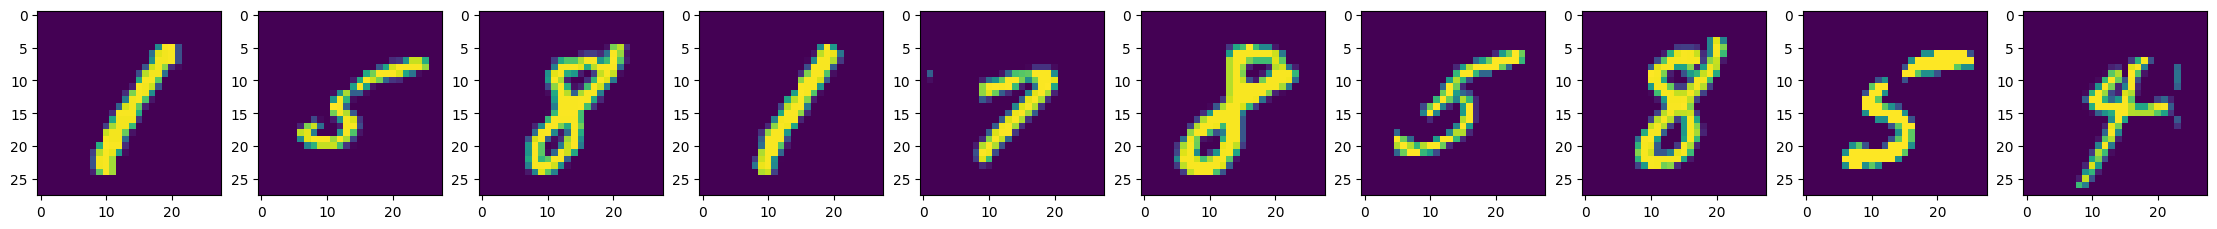

Images in cluster 1:


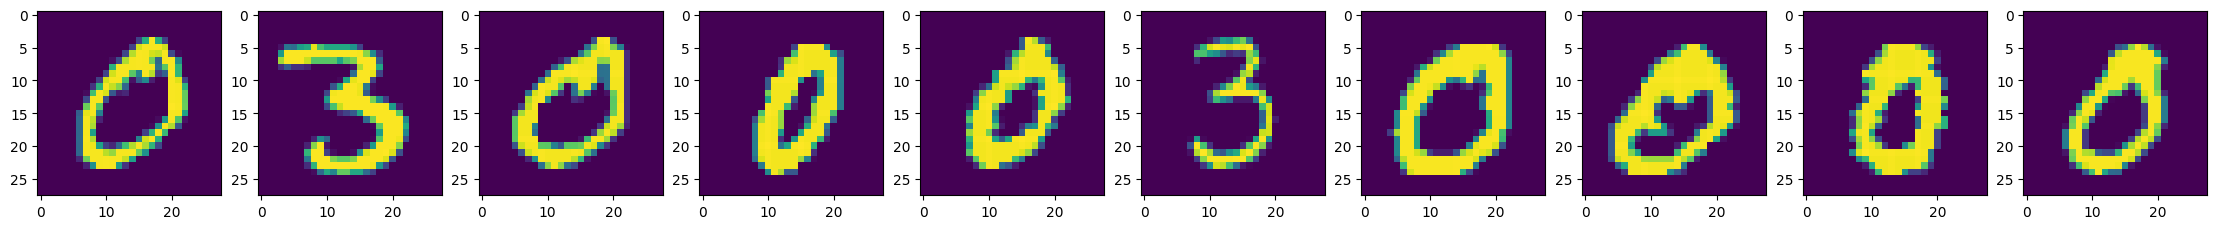

Images in cluster 2:


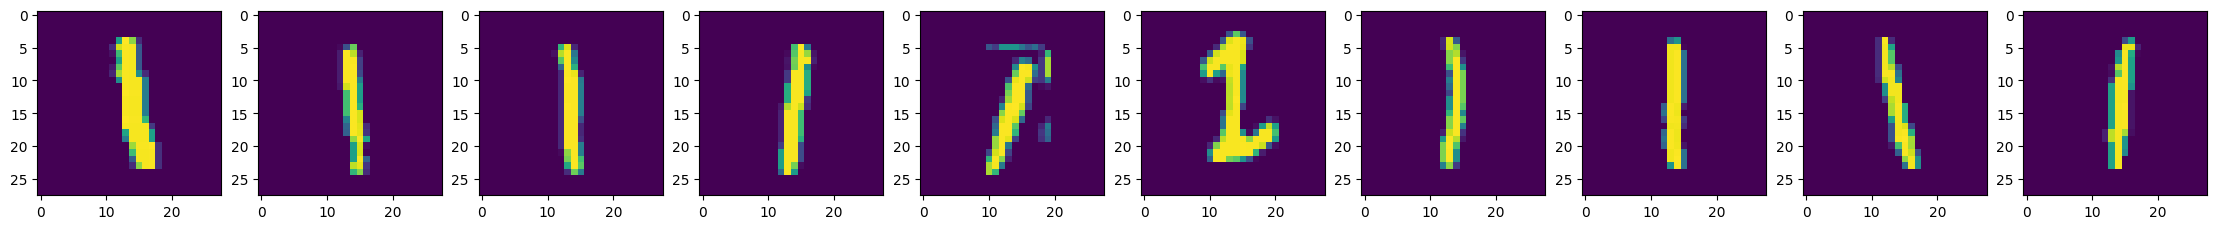

Images in cluster 3:


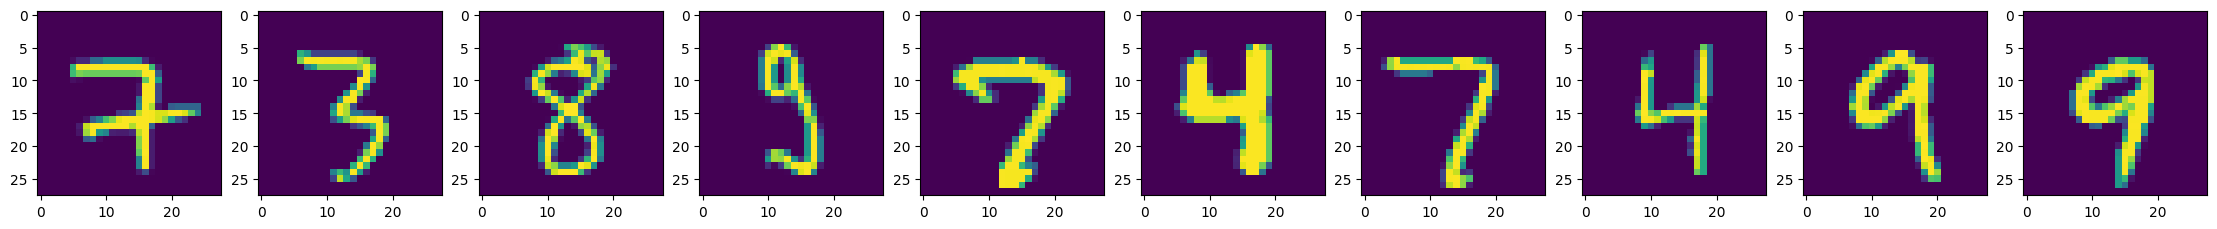

Images in cluster 4:


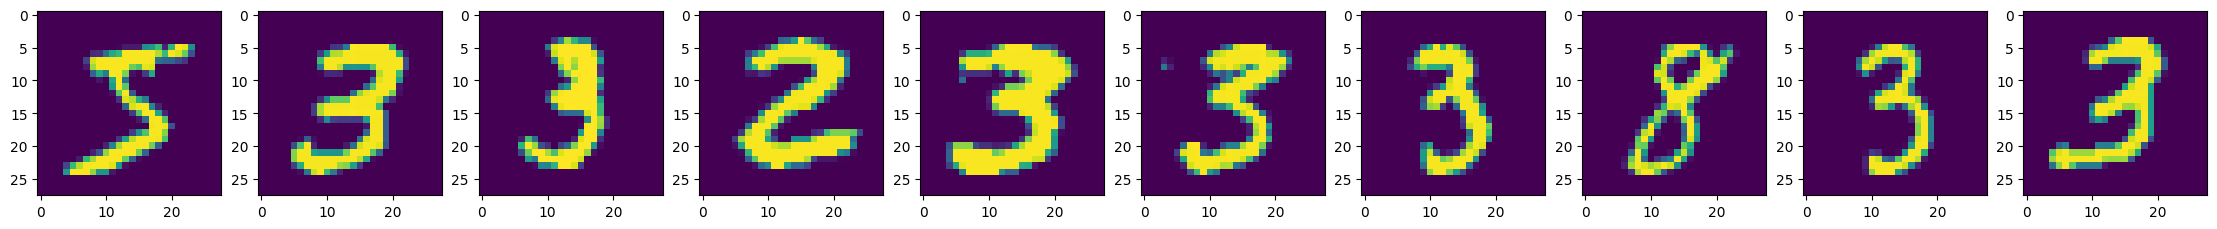

Images in cluster 5:


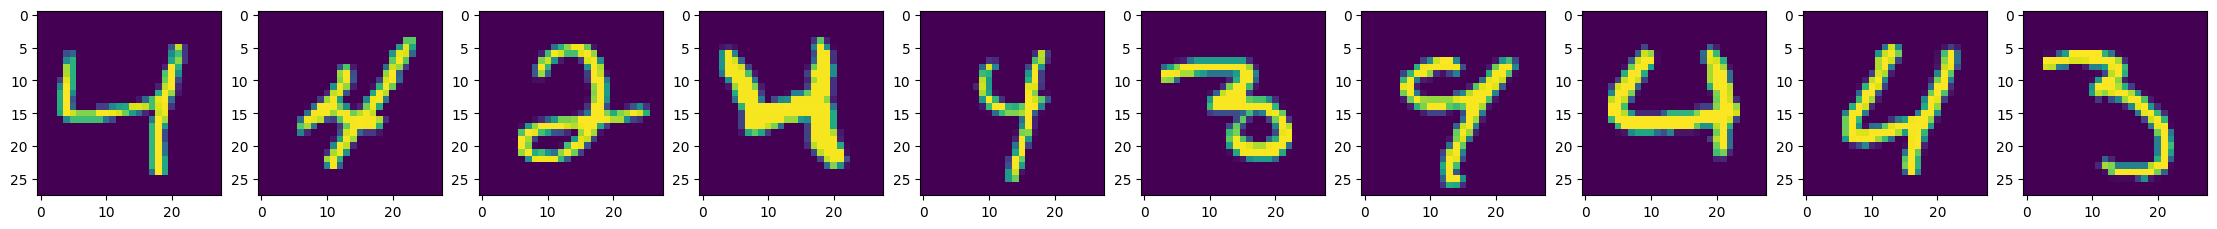

Images in cluster 6:


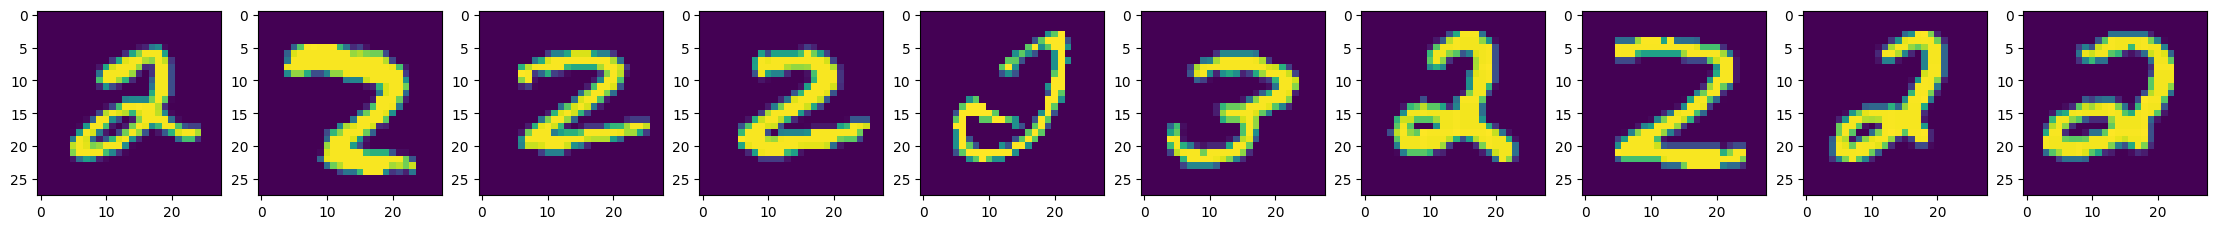

Images in cluster 7:


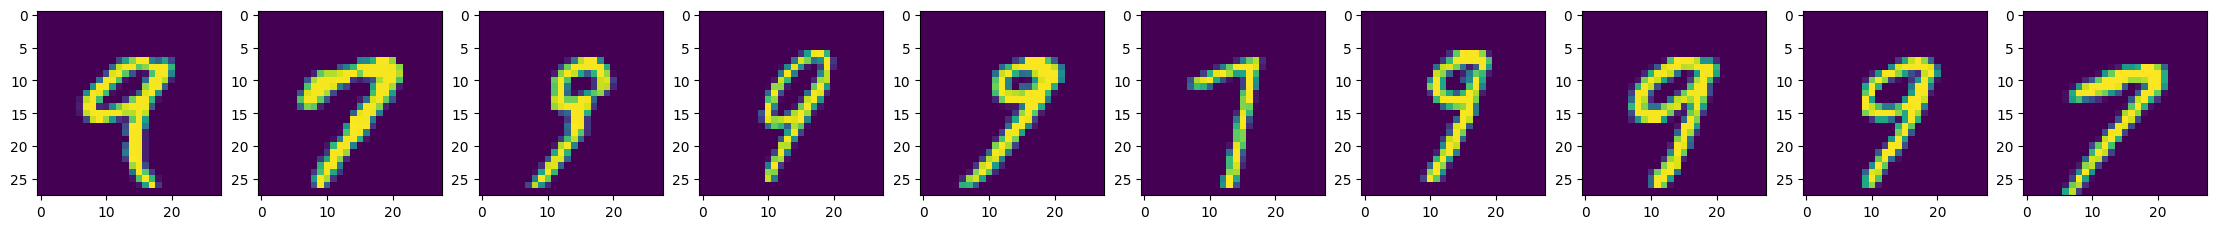

Images in cluster 8:


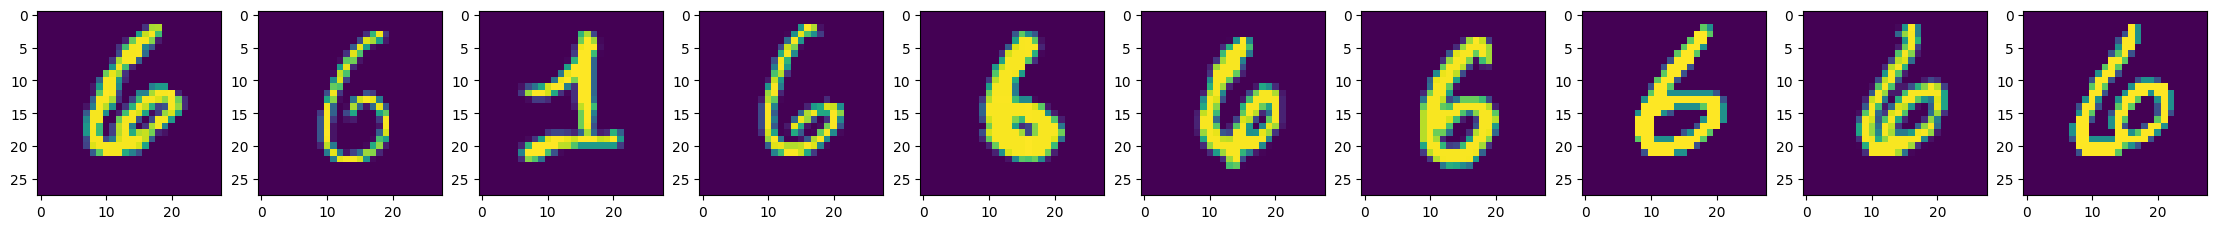

Images in cluster 9:


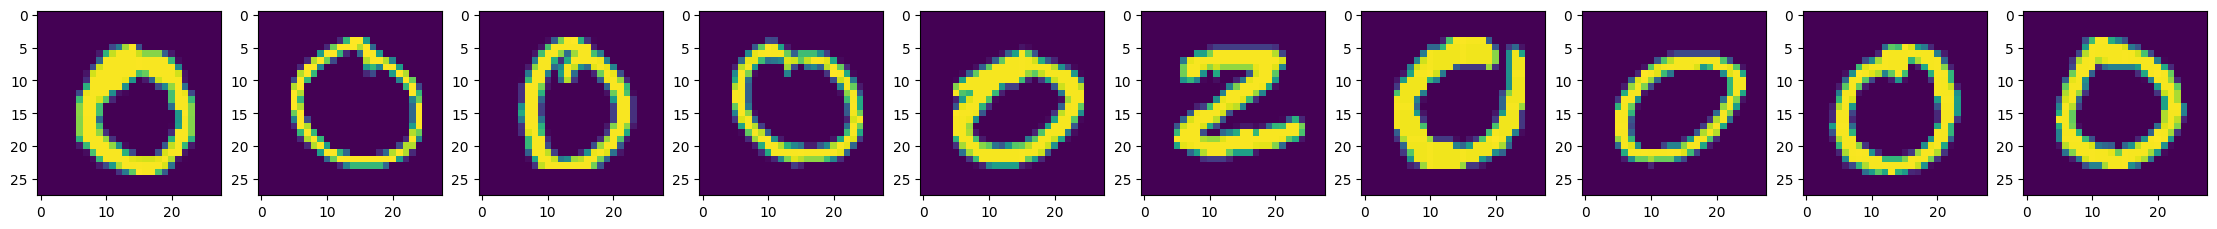

In [106]:
clusters = []
images = [[]]*10
for i in range(k):
    clusters.append(X[labels_rbf_kmeans == i])
    for j in range(10):
        images[j] = clusters[i][j].reshape(28,28)
    print("Images in cluster {}:".format(i))
    _, axs = plt.subplots(1, 10, figsize=(28, 28))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img)
    plt.show()

### Apendix

In [103]:
def pca(data, dimensions):
    centralized_data = data - np.mean(data , axis = 0)
    cov_mat = np.cov(centralized_data , rowvar = False)
    # for symmetric arrays
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    # sort eigen values
    top_k_eigenvalue_indexes = np.argsort(eigen_values)[::-1][:dimensions]
    sorted_eigenvalue = eigen_values[top_k_eigenvalue_indexes]
    # find the top k eigen values
    sorted_eigenvectors = eigen_vectors[:,top_k_eigenvalue_indexes]
    p = sorted_eigenvectors[:,:dimensions]

    reduced_data = (p.T @ centralized_data.T).T
    
    return reduced_data, np.cov(reduced_data , rowvar = False)

In [ ]:
def k_means(x, k = 10, max_iter = 50, threshold = 1e-3):
        losses = []
        prev_loss = 0
        n = x.shape[0]
        size = n // k
        centroids = {}
        # randomly assigning clusters
        np.random.shuffle(x)
        for i in range(k):
            start = i * size
            end = (i + 1) * size
            centroids[i] = x[start:end,:]

        for it in range(max_iter):
            clusters = {}
            for i in range(k):
                clusters[i] = []

            loss_sum = 0
            for feature in x:
                distances = [np.linalg.norm(feature - centroids[i]) for i in centroids]
                loss_sum += np.sum(np.array(distances)**2)
                cluster_index = distances.index(min(distances))
                clusters[cluster_index].append(feature)
            
            # print(it, loss_sum)
            losses.append(loss_sum)
            prev_centroids = dict(centroids)

            for cluster_index in clusters:
                centroids[cluster_index] = np.average(clusters[cluster_index],axis=0)

            if abs(loss_sum - prev_loss) < threshold:
                print(f"converge after {it} iterations")
                break
            prev_loss = loss_sum

        return clusters, losses
        
clusters, losses = k_means(data)

In [ ]:
# previous rbf implementation that wasn't working

def getHyperParameter(X):
    n = X.shape[0] # 500
    hyperparameter = 0
    for i in range(n):
        for j in range(n):
            hyperparameter += np.linalg.norm(X[i]-X[j])**2
    hyperparameter /= n**2
    return hyperparameter



def rbfKernel(X):
    n = X.shape[0] 
    hyperparameter = getHyperParameter(X)
    K=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = np.exp(-np.linalg.norm(X[i]-X[j])**2) / hyperparameter
    return K

def calculateDistances(Kernel, cluster_indexes, k = 10):
    res = []
    for cluster_num in range(k):
        kernel_indexes = np.flatnonzero((cluster_num == cluster_indexes))
        K = Kernel[kernel_indexes][:,kernel_indexes]
        # print(K.shape)
        n = K.shape[0]
        distances = np.zeros((n,10))
        k = 10
        if n < 10:
            k = n
            distances.fill(sys.maxsize)
        for j in range(k):
            for i in range(n):
                distances[i, j] = K[i, j] - 2 * sum(K[:,j]) / n + np.sum(K) / (n**2)
        res.append(distances)

    return np.array(res)

def compute_loss(distances):
    losses = 0
    for row in distances:
        for i in row:
            if i == sys.maxsize: continue
            losses += i**2
    return losses

def kernelKmean(X, iteration_limit = 30, threshold = 1e-4, k = 10):
    K = rbfKernel(X)
    n = K.shape[0]
    losses = []
    cluster_indexes = np.array([random.randint(0, k - 1) for _ in range(n)])
    prev_loss = 0
    # precomputing kernel
    K = rbfKernel(X) 
    print("running k means")
    for it in range(iteration_limit):
        loss_sum = 0
        distances = calculateDistances(K, cluster_indexes)
        distances = np.vstack(np.array(distances))
    
        loss_sum = compute_loss(distances)
        losses.append(loss_sum)

        cluster_indexes = np.array([np.argmin(i) for i in distances])
        print(it, loss_sum)
        if prev_loss == loss_sum:
            print(f"convergence achieved after {it} iterations")
            break
        prev_loss = loss_sum
       
    return cluster_indexes, losses

kernel_data = data[:500]
clusters, losses = kernelKmean(kernel_data)